<a href="https://colab.research.google.com/github/mgw54/Colab_Clones/blob/main/20250106_PR_turnoverdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tkinter
from tkinter import filedialog
import os
import csv
import re
from decimal import Decimal

import matplotlib.pyplot as plt


from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded))


import io
# Use pd.read_excel for .xlsx files
df = pd.read_excel(io.BytesIO(uploaded[filename]))
# Replace headers with the next row
df.columns = df.iloc[0]  # Set the first row as the new headers
df = df[1:]  # Remove the first row (which is now the headers)
print(df)


Saving 20250106_r5muts_averaged_turnover_data.xlsx to 20250106_r5muts_averaged_turnover_data.xlsx
0               NaN                             WT                  NaN  \
1     avg. time [s]  average turnover (µM S/ µM E)  stdev.s (FU / µM E)   
2                 0                              0                    0   
3             59.99                           -0.0                  0.0   
4            119.19                           -0.0                  0.0   
5            179.52                           -0.0                  0.0   
...             ...                            ...                  ...   
997        59703.98                       0.000001                  0.0   
998        59763.87                       0.000001                  0.0   
999        59823.86                       0.000001                  0.0   
1000       59883.95                       0.000001                  0.0   
1001       59944.07                       0.000001                  0.0   

0

In [ ]:
# Assuming your DataFrame is named 'df'
df_columns = list(df.columns)  # Convert Index to list for modification
df_columns[0] = 'Time'
df_columns[1] = 'WT'
df_columns[2] = 'WT_SD' # Change the second element (index 1)
df_columns[3] = '4.22 0.5 mM'
df_columns[4] = '4.22_0.5_SD'
df_columns[5] = '4.22 1 mM'
df_columns[6] = '4.22_1_SD'
df_columns[7] = '5.1'
df_columns[8] = '5.1_SD'
df_columns[9] = '5.2'
df_columns[10] = '5.2_SD'
df_columns[11] = '5.3'
df_columns[12] = '5.3_SD'
df_columns[13] = '5.4'
df_columns[14] = '5.4_SD'
df_columns[15] = '5.5'
df_columns[16] = '5.5_SD'
df_columns[17] = '5.6'
df_columns[18] = '5.6_SD'
df_columns[19] = '5.7'
df_columns[20] = '5.7_SD'
df_columns[21] = '5.8'
df_columns[22] = '5.8_SD'

# Convert back to Index if needed
df.columns = pd.Index(df_columns) # This line was already present
print(df.columns)
print(df)

Index(['Time', 'WT', 'WT_SD', '4.22 0.5 mM', '4.22_0.5_SD', '4.22 1 mM',
       '4.22_1_SD', '5.1', '5.1_SD', '5.2', '5.2_SD', '5.3', '5.3_SD', '5.4',
       '5.4_SD', '5.5', '5.5_SD', '5.6', '5.6_SD', '5.7', '5.7_SD', '5.8',
       '5.8_SD'],
      dtype='object')
               Time                             WT                WT_SD  \
1     avg. time [s]  average turnover (µM S/ µM E)  stdev.s (FU / µM E)   
2                 0                              0                    0   
3             59.99                           -0.0                  0.0   
4            119.19                           -0.0                  0.0   
5            179.52                           -0.0                  0.0   
...             ...                            ...                  ...   
997        59703.98                       0.000001                  0.0   
998        59763.87                       0.000001                  0.0   
999        59823.86                       0.000001         

In [ ]:
# Setting up the font to be the latex font beacuse I'm a sad bastard
import matplotlib as mpl
mpl.rcParams['font.family']='serif'
mpl.rcParams['mathtext.fontset']='cm'
import matplotlib.pyplot as plt

<ipython-input-63-2796553fe3d2>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 11)  # Create a colormap with enough colors


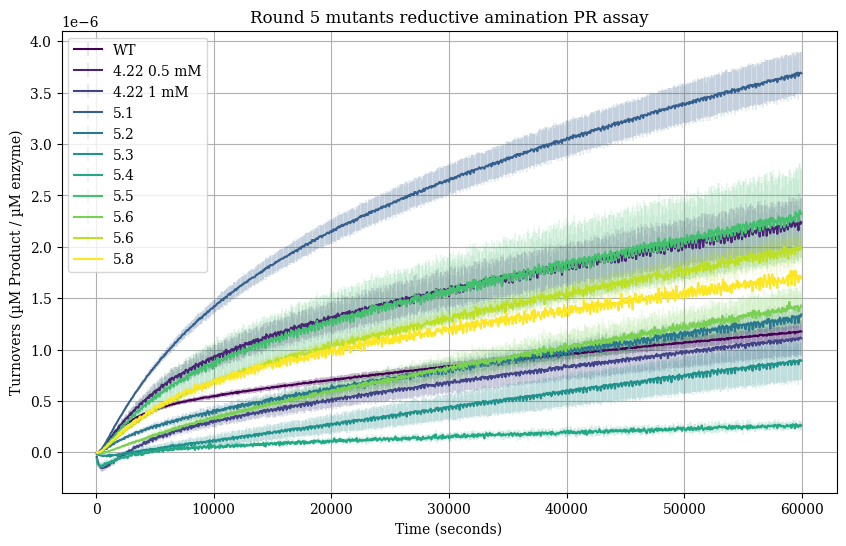

In [ ]:
# prompt: Create a plot of the 'WT' and '5.1' data from indices 2 and 1001 colouring the lines with the viridis colour palette

import matplotlib.cm as cm

# Assuming 'WT' and '5.1' are column names in your DataFrame
plt.figure(figsize=(10, 6))

# Use viridis colormap
viridis = cm.get_cmap('viridis', 11)  # Create a colormap with enough colors

# Plot 'WT' data
plt.errorbar(df.iloc[2:1002, 0], df['WT'][2:1002],  yerr=df['WT_SD'][2:1002], capsize=0, elinewidth=0.3,ecolor=(*viridis(0)[:3], 0.5),
             color=viridis(0), label='WT')

# Plot '4.22 0.5 mM' data
plt.errorbar(df.iloc[2:1002, 0], df['4.22 0.5 mM'][2:1002],  yerr=df['4.22_0.5_SD'][2:1002], capsize=0, elinewidth=0.3,ecolor=(*viridis(1)[:3], 0.5),
             color=viridis(1), label='4.22 0.5 mM')
# Plot '4.22 1 mM' data
plt.errorbar(df.iloc[2:1002, 0], df['4.22 1 mM'][2:1002],  yerr=df['4.22_1_SD'][2:1002], capsize=0, elinewidth=0.3,ecolor=(*viridis(2)[:3], 0.5),
             color=viridis(2), label='4.22 1 mM')
# Plot '5.1' data
plt.errorbar(df.iloc[2:1002, 0], df['5.1'][2:1002], yerr=df['5.1_SD'][2:1002], capsize=0, elinewidth=0.3,
             ecolor=(*viridis(3)[:3], 0.5), color=viridis(3), label='5.1')
# Plot '5.2' data
plt.errorbar(df.iloc[2:1002, 0], df['5.2'][2:1002],  yerr=df['5.2_SD'][2:1002], capsize=0, elinewidth=0.3,ecolor=(*viridis(4)[:3], 0.5),
             color=viridis(4), label='5.2')
# Plot '5.3' data
plt.errorbar(df.iloc[2:1002, 0], df['5.3'][2:1002],  yerr=df['5.3_SD'][2:1002], capsize=0, elinewidth=0.3,ecolor=(*viridis(5)[:3], 0.5),
             color=viridis(5), label='5.3')
# Plot '5.4' data
plt.errorbar(df.iloc[2:1002, 0], df['5.4'][2:1002],  yerr=df['5.4_SD'][2:1002], capsize=0, elinewidth=0.3,ecolor=(*viridis(6)[:3], 0.5),
             color=viridis(6), label='5.4')
# Plot '5.5' data
plt.errorbar(df.iloc[2:1002, 0], df['5.5'][2:1002],  yerr=df['5.5_SD'][2:1002], capsize=0, elinewidth=0.3,ecolor=(*viridis(7)[:3], 0.5),
             color=viridis(7), label='5.5')
# Plot '5.6' data
plt.errorbar(df.iloc[2:1002, 0], df['5.6'][2:1002],  yerr=df['5.6_SD'][2:1002], capsize=0, elinewidth=0.3,ecolor=(*viridis(8)[:3], 0.5),
             color=viridis(8), label='5.6')
# Plot '5.7' data
plt.errorbar(df.iloc[2:1002, 0], df['5.7'][2:1002],  yerr=df['5.7_SD'][2:1002], capsize=0, elinewidth=0.3,ecolor=(*viridis(9)[:3], 0.5),
             color=viridis(9), label='5.6')
# Plot '5.8' data
plt.errorbar(df.iloc[2:1002, 0], df['5.8'][2:1002],
             color=viridis(10), label='5.8')



plt.ylabel("Turnovers (µM Product / µM enzyme)")
plt.xlabel('Time (seconds)')
plt.title('Round 5 mutants reductive amination PR assay')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-6-1ce076cfe4e7>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 3)  # Create a colormap with enough colors


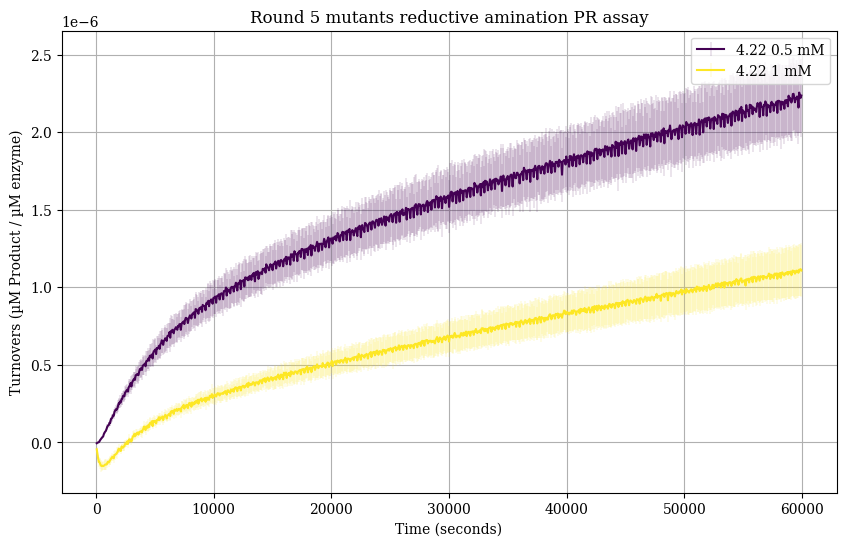

In [ ]:
# prompt: Create a plot of the 'WT' and '5.1' data from indices 2 and 1001 colouring the lines with the viridis colour palette

import matplotlib.cm as cm

# Assuming 'WT' and '5.1' are column names in your DataFrame
plt.figure(figsize=(10, 6))

# Use viridis colormap
viridis = cm.get_cmap('viridis', 3)  # Create a colormap with enough colors



# Plot '4.22 0.5 mM' data
plt.errorbar(df.iloc[2:1002, 0], df['4.22 0.5 mM'][2:1002],  yerr=df['4.22_0.5_SD'][2:1002], capsize=0, elinewidth=0.3,ecolor=(*viridis(0)[:3], 0.5),
             color=viridis(0), label='4.22 0.5 mM')
# Plot '4.22 1 mM' data
plt.errorbar(df.iloc[2:1002, 0], df['4.22 1 mM'][2:1002],  yerr=df['4.22_1_SD'][2:1002], capsize=0, elinewidth=0.3,ecolor=(*viridis(2)[:3], 0.5),
             color=viridis(2), label='4.22 1 mM')



plt.ylabel("Turnovers (µM Product / µM enzyme)")
plt.xlabel('Time (seconds)')
plt.title('Round 5 mutants reductive amination PR assay')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-8-fa6e0e653874>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 11)  # Create a colormap with enough colors


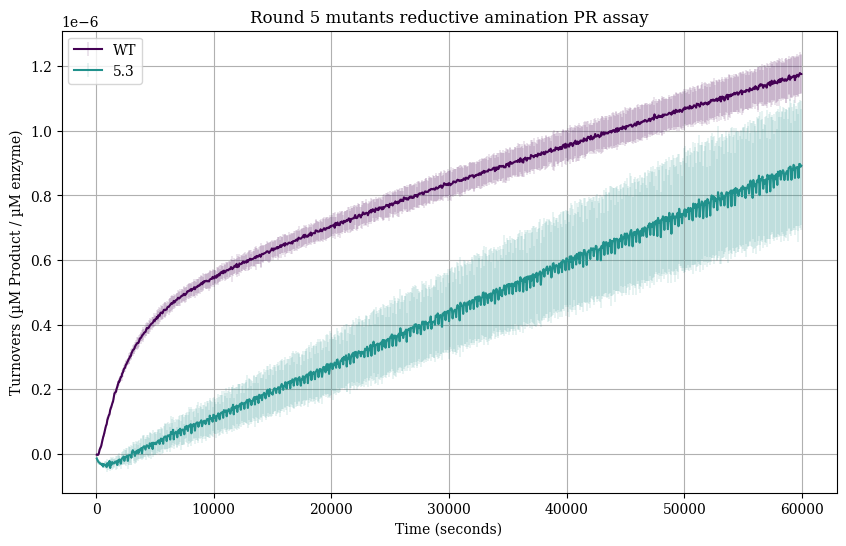

In [ ]:
# prompt: Create a plot of the 'WT' and '5.1' data from indices 2 and 1001 colouring the lines with the viridis colour palette

import matplotlib.cm as cm

# Assuming 'WT' and '5.1' are column names in your DataFrame
plt.figure(figsize=(10, 6))

# Use viridis colormap
viridis = cm.get_cmap('viridis', 11)  # Create a colormap with enough colors

# Plot 'WT' data
plt.errorbar(df.iloc[2:1002, 0], df['WT'][2:1002],  yerr=df['WT_SD'][2:1002], capsize=0, elinewidth=0.3,ecolor=(*viridis(0)[:3], 0.5),
             color=viridis(0), label='WT')


# Plot '5.3' data
plt.errorbar(df.iloc[2:1002, 0], df['5.3'][2:1002],  yerr=df['5.3_SD'][2:1002], capsize=0, elinewidth=0.3,ecolor=(*viridis(5)[:3], 0.5),
             color=viridis(5), label='5.3')




plt.ylabel("Turnovers (µM Product / µM enzyme)")
plt.xlabel('Time (seconds)')
plt.title('Round 5 mutants reductive amination PR assay')
plt.legend()
plt.grid(True)
plt.show()